# Week 2: Statistics and Multi-armed Bandit

During first week, Zipfian/Galvanize staff had told us that week two (stats week) was way more dense. In fact they said it was the week that past students hated the most. Statistics, pain or pleasure, is something you have to understand and get down if you want to make it as a data scientist. Thankfully between the prep work and instruction during the week the struggle wasn't too tough. I grew more as a person intellectually during this week than I had in a very long time. I was surprising myself as I understood new topics and applied them to other area in life. Specifically, thinking about physical life in terms of distributions gave me a whole new perspective.

I'm officially a believer...Anything *can* happen...but where is that event on the distribution of what is *likely* to happen given our information?

Here's some of the material we went over:
1. Probability review
2. Bootstrapping
3. A ton of Central Limit Theorem
4. Confidence Intervals
5. MLE, MOM
6. Z vs T testing
7. Hypothesis testing
8. Bayesian framework
9. Multi-armed Bandit

For the code of the week I want to share a model that [Jefferson](https://github.com/JJconde) and I made exploring what method for Multi-armed Bandit is best given different data. 

###Multi-Armed Bandits
####Background
We have all heard of A/B testing. Serve up two versions of a website (version A and B), display them to random users, and check the results at the end to see if your key metric has increased. This method works well and is easy to understand but it has some flaws. In life, version A or B *IS* going to be better. If one of them is better, that means that one of them *IS* worse. Doesn't it seem unwise to serve up the version that performs worse when you could be exploring the version that does better?

You see in A/B testing you set your test up, run it, collect data, and then at the end make your change based off of that data. This process is slow and serves the low-performing website too much. This is the problem Multi-armed Bandits fixes. MAB reduces the amount of **regret** (amount of time you served the underperforming version). MAB says, hey, lets run our test, and constantly be making changes to which one gets served based off of our criteria. In one version of MAB, **epsilon-greedy**, we will serve the version that does the best 90% of the time and then randomly pick another version 10% of the time. This way we give all sites a chance to prove they are the best, but we increase the amount of time that our best performing site is in front of the customer, users, etc. 

Here are a couple methods we are going to test out:

####Epsilon-Greedy
Show your best performing version 90% of the time, randomly select a site the other 10%

####Softmax Algorithm
Choose the bandit (version) randomly in proportion to its expected value.

####Upper Confidence Bound
Take into account the number of times a bandit has been shown. Ex. If version A was successful 0/10 times and B was successful 1/100 times. B is technically better, but I would be curious to see what A could do with 100 trails. UCB1 weights towards A slightly to give it a chance to bump up.

####Bayesian Bandit Algorithm

Bayesian Bandit Algorithm method is awesome 1. Because there is an insane amount of math going on in the background, and because you can visual represent what is going on easily. Basically make two beta distributions, each with alpha and beta parameters of, 1 + number of times won, 1 + number of times lost, respectively. After you make the distributions, pull a random variable from each and see which one comes out higher and serve that version up

####Max Mean

Pick the bandit with the current best observed proportion of winning. Return the index of the winning bandit.

## Regret
Without going into the math of regret, know that when comparing two MAB methods, the higher regret the worse. It is basically the cumulative sum of how many times the sub-optimal version of the site got served up. Down below we will graph regret over time and compare all methods


First import your packages

In [2]:
from bandit import Bandits
import banditstrategy as bs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Next lets go through a couple different scnarios that we would potentially face in the field. In reality, we wouldn't know these distributions, these are the fundemental true values of how a different version works. However, our test seeks to find these true percentages through testing. So for example [0.01, 0.012, 0.01, 0.013, 0.05] means version A works 1% of the time, B1.2%, C 1% etc...

Next we will loop through all of our different MAB strategies and print out our results

In [3]:
scene = [0.01, 0.012, 0.01, 0.013, 0.05]
for strategy in [bs.max_mean, bs.random_choice, bs.epsilon_greedy, bs.softmax, bs.ucb1, bs.bayesian_bandit]:
    print scene
    print "Method: %s" % strategy.__name__
    bandits = Bandits(scene)
    strat = bs.BanditStrategy(bandits, strategy)
    strat.sample_bandits(1000)
    print "Number of trials:", strat.trials
    print "Number of wins:", strat.wins
    print "Conversion rates:", strat.wins / strat.trials
    print "A total of %d wins of %d trials." % \
        (strat.wins.sum(), strat.trials.sum())
    print "\n"

[0.01, 0.012, 0.01, 0.013, 0.05]
Method: max_mean
Number of trials: [ 994.    1.    1.    2.    2.]
Number of wins: [ 11.   0.   0.   0.   0.]
Conversion rates: [ 0.0110664  0.         0.         0.         0.       ]
A total of 11 wins of 1000 trials.


[0.01, 0.012, 0.01, 0.013, 0.05]
Method: random_choice
Number of trials: [ 197.  219.  203.  201.  180.]
Number of wins: [  2.   2.   1.   3.  11.]
Conversion rates: [ 0.01015228  0.00913242  0.00492611  0.01492537  0.06111111]
A total of 19 wins of 1000 trials.


[0.01, 0.012, 0.01, 0.013, 0.05]
Method: epsilon_greedy
Number of trials: [ 141.   53.   21.   23.  762.]
Number of wins: [  2.   2.   0.   0.  43.]
Conversion rates: [ 0.0141844   0.03773585  0.          0.          0.05643045]
A total of 47 wins of 1000 trials.


[0.01, 0.012, 0.01, 0.013, 0.05]
Method: softmax
Number of trials: [  31.   31.   31.   31.  876.]
Number of wins: [  0.   0.   0.   0.  51.]
Conversion rates: [ 0.          0.          0.          0.          0.05

###Results
The ultimate goal is to maximize the number of times we pick the best strategy to win. In this case softmax looks to give us the most 'wins' out of the 100 trials. However, that is not the whole picture, perhaps a sub-optimal choice got lucky? Lets take a look at the regret over time with trials. Remember, regret will go up when you are showing a sub-optimal choice to users (an unfavorable event). For example, in our first scenario we had, scene = [0.01, 0.012, 0.01, 0.013, 0.05]. Regret will go up when we show any choice other than our .05 version.

### Okay thats cool but...

What I want to know is what kinds of methods do we need to apply to what kinds of scenarios in order to minimize regret? Lets plot out the cumulative regret for all methods against different distributions and see what we get...

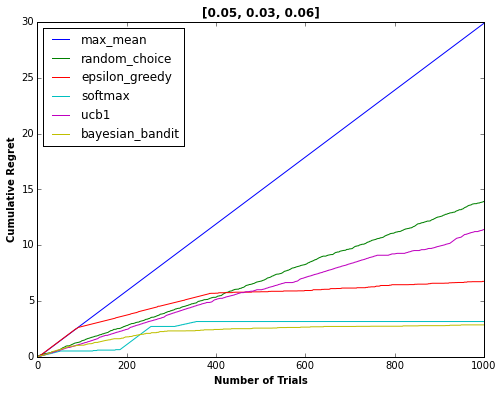

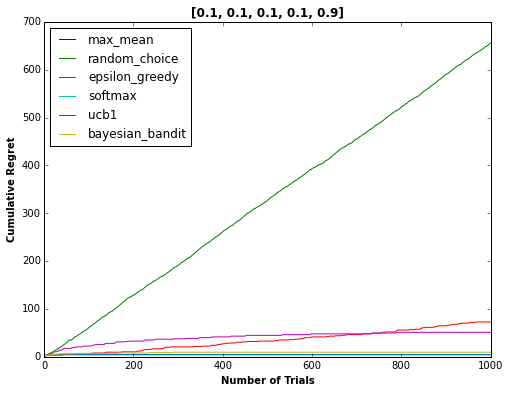

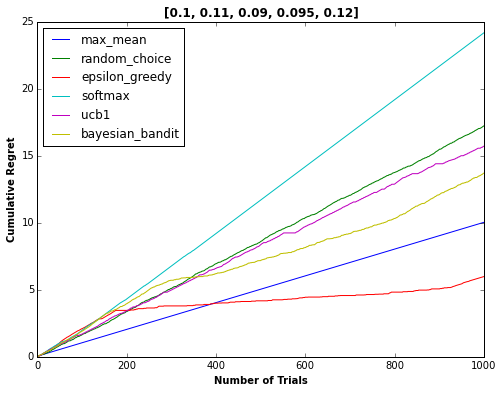

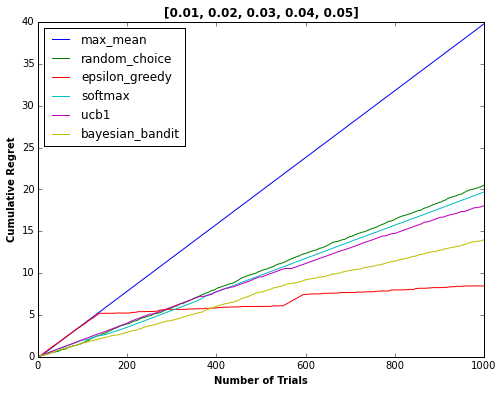

In [8]:
def regret(probabilities, choices):
    p_opt = np.max(probabilities)
    return np.cumsum(p_opt - probabilities[choices])

def plot_strategy(probability, strategy):
    strat_label = strategy.__name__
    bandits = Bandits(np.array(probability))
    strat = bs.BanditStrategy(bandits, strategy)
    strat.sample_bandits(1000)
    band_regret = regret(np.array(probability), strat.choices.astype(int))
    x = np.linspace(1, len(band_regret)+1, len(band_regret))
    plt.plot(x, band_regret, label=strat_label)
    plt.legend(loc=2)
    plt.xlim(0,1000)


for scene in [[0.05, 0.03, 0.06],
            [0.1, 0.1, 0.1, 0.1, 0.9],
             [0.1, 0.11, 0.09, 0.095, 0.12],
             [0.01, 0.02, 0.03, 0.04, 0.05]]:
    plt.figure(figsize=(8,6))
    for strategy in [bs.max_mean, bs.random_choice, bs.epsilon_greedy, bs.softmax, bs.ucb1, bs.bayesian_bandit]:
        plot_strategy(scene, strategy)
    plt.title(scene, fontweight='bold')
    plt.xlabel('Number of Trials', fontweight='bold')
    plt.ylabel('Cumulative Regret', fontweight='bold')
    plt.show()

##The Analysis
Lets go through each scenario and try to understand why we are seeing the results that we are.

**[0.05, 0.03, 0.06] - The Simple Distribution**

The first thing that jumps out here is that picking bandit with the highest win % is clearly not working. During the 1000 trials the suboptimal choice must be getting picked constantly. Makes sense, max_mean isn't very smart.

**[0.1, 0.1, 0.1, 0.1, 0.9] - The Clear Winner**

Here we have a version that is going to clearly win. In this case, we want to minimize a 'random' pick. I'm sure after a couple rounds there is little reason to pick anything other than our .9 version. As such, random choice and epsilon greedy (both have a random aspect to them) turn out to be the worst two options. Random is good, but not when you have a clear winner.

**[0.1, 0.11, 0.09, 0.095, 0.12] - The Tight Race**

This version has a close race between all of the different options. Having a method that is smart enough to pick the best but applies a touch of randomness to include others will be key. Epsilon greedy seems to be the best option for this fit. Remember that it picks the best option 90% of the time and randomly chooses another the rest of the 10%. 
This scenario, the tight race, would be my guess for what most of life looks like. When you are testing small changes, the percentages between all of your options won't be huge, they will be minute. This makes me consider using mostly epsilon greedy for the field.

**[0.01, 0.02, 0.03, 0.04, 0.05] - The Gradual Incline**

Here we have a couple options, some better than others but no clear winner. Epsilon greedy again takes the cake with minimizing regret. It is interesting to see the 'elbows' or points where the method swithed which scenario it was showing temporarily and racked up an increasing amount of regret. 

###Take Aways
Don't leave your Multi-armed Bandit strictly up to random choice or the method that happened to be winning the race (max_mean) at that time. Have a smart strategy that will take other factors into account. When in doubt, always use two methods and make sure you get a result inline with your logic.